In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [159]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,name='smoke_layer'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu',name='Yellow_Flame_Layer'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu',name='Orange_Flame_Layer'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Use 'softmax' for multiclass classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust loss if multiclass
    return model
    model.add(layer.Fatten())
    model.add(layers.Dense(128,action='relu'))
    model.add(layers.Dense(10,action='softmax'))
    model.summary()


In [11]:
train_dir = 'dataset/train'
validation_dir = 'dataset/validation'

# Data Augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images as needed
    batch_size=32,
    class_mode='binary'  # Binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 104 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


In [13]:
input_shape = (150, 150, 3)  # Image dimensions (height, width, channels)
model = create_cnn_model(input_shape)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=209,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

C:\Users\User1\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User1\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5104 - loss: 0.9654

C:\Users\User1\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5078 - loss: 1.0127 - val_accuracy: 0.4375 - val_loss: 0.7110
Epoch 2/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.3750 - loss: 0.7070 - val_accuracy: 0.6667 - val_loss: 0.4754
Epoch 3/209


C:\Users\User1\New folder\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6016 - loss: 0.6557 - val_accuracy: 0.6562 - val_loss: 0.5857
Epoch 4/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7500 - loss: 0.6669 - val_accuracy: 0.7778 - val_loss: 0.6109
Epoch 5/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7153 - loss: 0.6379 - val_accuracy: 0.7292 - val_loss: 0.5427
Epoch 6/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8125 - loss: 0.4619 - val_accuracy: 0.7778 - val_loss: 0.3991
Epoch 7/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7470 - loss: 0.5089 - val_accuracy: 0.8021 - val_loss: 0.4897
Epoch 8/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7500 - loss: 0.6040 - val_accuracy: 0.5556 - val_loss: 0.8735
Epoch 9/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6854 - loss: 0.6360 - val_accuracy: 0.8021 - val_loss: 0.4571
Epoch 10/209
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7188 - loss: 0.4892 - val_accuracy: 0.5556 - val_loss: 0.8355
Epoch 11/20

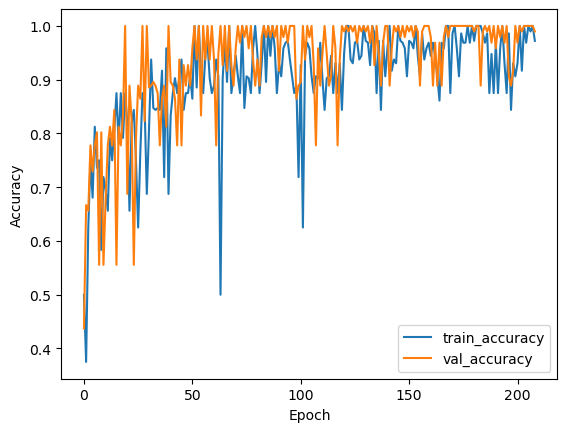

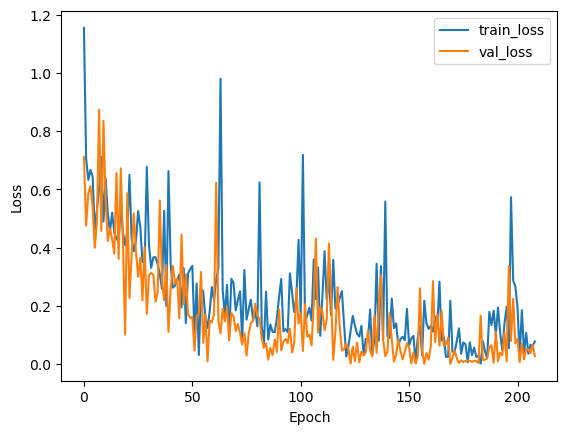

In [15]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
model.save('forest_fire_detection_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[99.99453]]
No Fire Detected


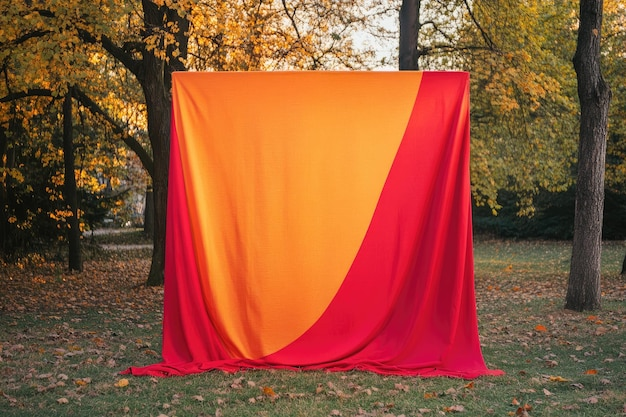

In [23]:
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display
import numpy as np

image_path=r"C:\Users\User1\Desktop\test_data\test11.jpg"
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    print(prediction*100)
    if prediction < 0.5:
        print("Fire Detected")
    else:
        print("No Fire Detected")
predict_image(image_path, model)
display(Image(filename=image_path))